Raster CRS: EPSG:21781
Basins CRS: epsg:2056
Reprojected basins to match raster CRS.
Pixel area: 250000.0 square meters
Glacier GDF has 4255 features
Basin ID V1: Glacier area = 0.0
Basin ID V2: Glacier area = 0.0
Basin ID V3: Glacier area = 0.0
Basin ID V4: Glacier area = 0.0
Basin ID V5: Glacier area = 0.0
Basin ID V6: Glacier area = 0.0
Basin ID V7: Glacier area = 0.0
Basin ID V8: Glacier area = 29786.71760253049
Basin ID V9: Glacier area = 0.0
Basin ID V10: Glacier area = 0.0
Basin ID V11: Glacier area = 0.0
Basin ID V12: Glacier area = 8196865.903803864
Basin ID V13: Glacier area = 12498024.473120378
Basin ID V14: Glacier area = 8091022.542319407
Basin ID V15: Glacier area = 0.0
Basin ID V16: Glacier area = 0.0
Basin ID V17: Glacier area = 0.0
Basin ID V18: Glacier area = 1074901.0586239693
Basin ID V19: Glacier area = 0.0
Basin ID V20: Glacier area = 0.0
Basin ID V21: Glacier area = 5481021.02490723
Basin ID V22: Glacier area = 0.0
Basin ID V23: Glacier area = 274061.2970972004
B

C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:67: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries


Basin ID V221: Glacier area = 17204245.847105436
Basin ID V222: Glacier area = 0.0
Basin ID V223: Glacier area = 0.0
Basin ID V224: Glacier area = 250000.0
Basin ID V225: Glacier area = 0.0
Basin ID V226: Glacier area = 1469042.1735643074
Basin ID V227: Glacier area = 0.0
Basin ID V228: Glacier area = 0.0
Basin ID V229: Glacier area = 0.0
Basin ID V230: Glacier area = 0.0
Basin ID V231: Glacier area = 0.0
Basin ID V232: Glacier area = 0.0
Basin ID V233: Glacier area = 0.0
Basin ID V234: Glacier area = 1668623.4406226291
Basin ID V235: Glacier area = 0.0
Basin ID V236: Glacier area = 0.0
Basin ID V237: Glacier area = 0.0
Basin ID V238: Glacier area = 0.0
Basin ID V239: Glacier area = 0.0
Basin ID V240: Glacier area = 0.0
Basin ID V241: Glacier area = 0.0
Basin ID V242: Glacier area = 0.0
Basin ID V243: Glacier area = 0.0
Basin ID V244: Glacier area = 0.0
Basin ID V245: Glacier area = 0.0
Basin ID V246: Glacier area = 0.0
Basin ID V247: Glacier area = 0.0
Basin ID V248: Glacier area = 0.

C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:67: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries


Basin ID V1063: Glacier area = 5446150.348870758
Basin ID V1064: Glacier area = 0.0
Basin ID V1065: Glacier area = 0.0
Basin ID V1066: Glacier area = 0.0
Basin ID V1067: Glacier area = 0.0
Basin ID V1068: Glacier area = 0.0
Basin ID V1069: Glacier area = 0.0
Basin ID V1070: Glacier area = 0.0
Basin ID V1071: Glacier area = 0.0
Basin ID V1072: Glacier area = 0.0
Basin ID V1073: Glacier area = 0.0
Basin ID V1074: Glacier area = 0.0
Basin ID V1075: Glacier area = 0.0
Basin ID V1076: Glacier area = 0.0
Basin ID V1077: Glacier area = 0.0
Basin ID V1078: Glacier area = 0.0
Basin ID V1079: Glacier area = 530789.4010624086
Basin ID V1080: Glacier area = 0.0
Basin ID V1081: Glacier area = 0.0
Basin ID V1082: Glacier area = 0.0
Basin ID V1083: Glacier area = 0.0
Basin ID V1084: Glacier area = 0.0
Basin ID V1085: Glacier area = 0.0
Basin ID V1086: Glacier area = 0.0
Basin ID V1087: Glacier area = 0.0
Basin ID V1088: Glacier area = 0.0
Basin ID V1089: Glacier area = 0.0
Basin ID V1090: Glacier are

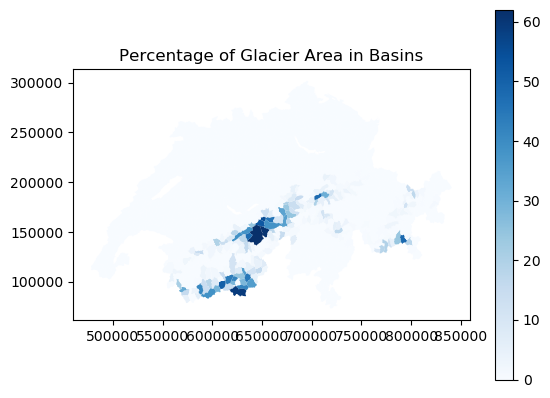

In [10]:
import geopandas as gpd
import rasterio
import numpy as np
from shapely.geometry import box
import matplotlib.pyplot as plt
from rasterio.crs import CRS

# Load the shapefile of basins
basins_shapefile = "N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/ebene_40km_with_ids.shp"  # Replace with the path to your basins shapefile
basins = gpd.read_file(basins_shapefile)

# Load the glacier raster (ASC file)
glacier_raster = "N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/Mob500_glm.ASC"  # Replace with the path to your glacier raster
with rasterio.open(glacier_raster) as src:
    glacier_array = src.read(1)  # Read raster data as a NumPy array
    glacier_transform = src.transform  # Get the affine transformation of the raster
    raster_crs = src.crs or CRS.from_epsg(21781)  # Assign EPSG:21781 if not defined
    raster_nodata = src.nodata  # Get the NoData value

# Debugging: Print CRS information
print(f"Raster CRS: {raster_crs}")
print(f"Basins CRS: {basins.crs}")

# Ensure CRS of basins matches the raster CRS (EPSG:21781)
if basins.crs != raster_crs:
    basins = basins.to_crs(crs=raster_crs)
    print("Reprojected basins to match raster CRS.")

# Calculate pixel area (assuming the raster is in projected CRS, e.g., meters)
pixel_area = abs(glacier_transform[0] * glacier_transform[4])  # Pixel width * height
print(f"Pixel area: {pixel_area} square meters")

# Create a GeoDataFrame for raster pixels that represent glaciers
rows, cols = glacier_array.shape
glacier_pixels = []
for row in range(rows):
    for col in range(cols):
        value = glacier_array[row, col]
        if value != raster_nodata and value > 0:  # Glacier pixels only
            x, y = rasterio.transform.xy(glacier_transform, row, col, offset="center")
            pixel_geometry = box(
                x - glacier_transform[0] / 2,
                y - abs(glacier_transform[4]) / 2,
                x + glacier_transform[0] / 2,
                y + abs(glacier_transform[4]) / 2
            )
            glacier_pixels.append((value, pixel_geometry))

# Create a GeoDataFrame for glacier pixels
glacier_gdf = gpd.GeoDataFrame(
    glacier_pixels, columns=["value", "geometry"], crs=raster_crs
)

# Debugging: Check if glacier_gdf is created correctly
print(f"Glacier GDF has {len(glacier_gdf)} features")

# Perform spatial intersection between basins and glacier pixels
basins["glacier_area"] = 0.0  # Initialize glacier area column
for idx, basin in basins.iterrows():
    # Initialize glacier_area for the current basin
    glacier_area = 0.0

    # Convert basin to GeoDataFrame
    basin_gdf = gpd.GeoDataFrame([basin], geometry="geometry", crs=basins.crs)
    
    # Perform intersection
    intersected = gpd.overlay(glacier_gdf, basin_gdf, how="intersection")
    if not intersected.empty:
        intersected["area"] = intersected.geometry.area  # Calculate area of intersected pixels
        glacier_area = intersected["area"].sum()
        basins.at[idx, "glacier_area"] = glacier_area

    # Debugging: Check glacier area for this basin
    print(f"Basin ID {basin['ID']}: Glacier area = {glacier_area}")

# Calculate basin area if not already present
if "area" not in basins.columns:
    basins["area"] = basins.geometry.area  # Calculate basin area

# Calculate percentage of glacier coverage
basins["glacier_percent"] = (basins["glacier_area"] / basins["area"]) * 100

# Debugging: Print the results
print(basins[["ID", "glacier_area", "area", "glacier_percent"]])
"""
# Save the updated GeoDataFrame to a shapefile
output_file = "basins_with_glacier_coverage.shp"
basins.to_file(output_file)

print(f"Results saved to {output_file}")
"""
# Optional: Visualize the glacier percentages
basins.plot(column="glacier_percent", legend=True, cmap="Blues")
plt.title("Percentage of Glacier Area in Basins")
plt.show()


In [11]:
# Extract relevant data into a pandas DataFrame
results_table = basins[["ID", "glacier_percent"]]
print(results_table)

         ID  glacier_percent
0        V1         0.000000
1        V2         0.000000
2        V3         0.000000
3        V4         0.000000
4        V5         0.000000
...     ...              ...
1165  V1166         1.382754
1166  V1167         5.367474
1167  V1168         0.000000
1168  V1169         0.000000
1169  V1170         0.000000

[1170 rows x 2 columns]


In [2]:
# load glacier component
import xarray as xr
gl_path = "../PREVAH/input_data/GL_prevah.nc"

GL_prevah = xr.open_dataset(gl_path)

print(GL_prevah)

<xarray.Dataset>
Dimensions:  (ID: 1170, nday: 15340)
Coordinates:
  * nday     (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * ID       (ID) object 'V1' 'V2' 'V3' 'V4' ... 'V1167' 'V1168' 'V1169' 'V1170'
Data variables:
    gl0      (nday, ID) float64 ...
    gl1      (nday, ID) float64 ...
    gl_tot   (nday, ID) float64 ...


In [3]:
import numpy as np
import pandas as pd
import xarray as xr

# Extrahiere Jahre aus dem Datensatz
years = np.unique(GL_prevah["nday"].dt.year)

# Vorbereitung für das neue Dataset
relevant_TP = ['01/05-30/09', '01/06-30/09', '01/07-30/09', '01/08-30/09', '01/09-30/09']
ID = GL_prevah["ID"].values  # Alle ID-Werte

# Leerer Container für die Ergebnisse
data = np.full((len(ID), len(years), len(relevant_TP)), np.nan)

# Berechnung der Summen
for i, tp in enumerate(relevant_TP):
    # Splitte die Target Period in Start- und Enddatum
    start_day, start_month = map(int, tp.split('-')[0].split('/'))
    end_day, end_month = map(int, tp.split('-')[1].split('/'))

    # Iteriere über Jahre
    for j, year in enumerate(years):
        # Zeitraum filtern
        start_date = pd.Timestamp(year=year, month=start_month, day=start_day)
        end_date = pd.Timestamp(year=year, month=end_month, day=end_day)
        period_data = GL_prevah.sel(nday=slice(start_date, end_date))
        
        # Berechne die Summe von gl_tot für jede ID
        if period_data["gl_tot"].size > 0:  # Sicherstellen, dass Daten vorhanden sind
            data[:, j, i] = period_data["gl_tot"].sum(dim="nday").values

# Neues xarray.Dataset erstellen
glacier_component = xr.Dataset(
    {
        "gl_tot_sum": (["ID", "year", "relevant_TP"], data)
    },
    coords={
        "ID": ID,
        "year": years,
        "relevant_TP": relevant_TP
    }
)

# Ergebnis anzeigen
print(glacier_component)

# Optional: Speichern des neuen Datensatzes
# glacier_component.to_netcdf("glacier_component.nc")


<xarray.Dataset>
Dimensions:      (ID: 1170, relevant_TP: 5, year: 42)
Coordinates:
  * ID           (ID) object 'V1' 'V2' 'V3' 'V4' ... 'V1168' 'V1169' 'V1170'
  * year         (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * relevant_TP  (relevant_TP) <U11 '01/05-30/09' ... '01/09-30/09'
Data variables:
    gl_tot_sum   (ID, year, relevant_TP) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0


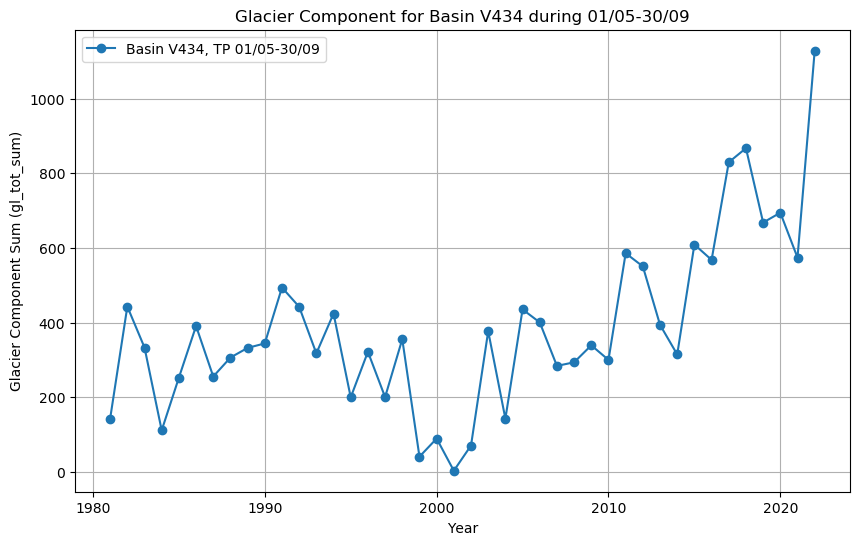

In [4]:
import matplotlib.pyplot as plt

# ID und Target Period auswählen
basin_id = 'V434'
target_period = '01/05-30/09'

# Daten für das ausgewählte Basin und die Target Period extrahieren
if basin_id in glacier_component["ID"].values and target_period in glacier_component["relevant_TP"].values:
    data_to_plot = glacier_component.sel(ID=basin_id, relevant_TP=target_period)["gl_tot_sum"]

    # Plotten
    plt.figure(figsize=(10, 6))
    plt.plot(glacier_component["year"], data_to_plot, marker='o', label=f'Basin {basin_id}, TP {target_period}')
    plt.title(f'Glacier Component for Basin {basin_id} during {target_period}')
    plt.xlabel('Year')
    plt.ylabel('Glacier Component Sum (gl_tot_sum)')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print(f"Basin ID {basin_id} or Target Period {target_period} not found in the dataset.")


In [15]:
# lade SWE data
swe_path = "../PREVAH/input_data/SWE_prevah.nc"

SWE_prevah = xr.open_dataset(swe_path)

print(SWE_prevah)
print(SWE_prevah.sel(Station_ID='V434')["swe"].values)

<xarray.Dataset>
Dimensions:     (Station_ID: 1170, time: 15340)
Coordinates:
  * time        (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * Station_ID  (Station_ID) object 'V1' 'V2' 'V3' ... 'V1168' 'V1169' 'V1170'
    lon         (Station_ID) float64 ...
    lat         (Station_ID) float64 ...
Data variables:
    swe         (time, Station_ID) float64 ...
[209.403 217.799 240.726 ...  84.487  85.978  85.09 ]


In [17]:
import numpy as np
import pandas as pd
import xarray as xr

# Extrahiere Jahre aus dem Datensatz
years = np.unique(SWE_prevah["time"].dt.year)

# Initialisiere die relevanten Initialisierungsdaten
relevant_init_dates = ['01/05', '01/06', '01/07', '01/08', '01/09']

# Vorbereitung des Containers für die neuen Daten
data = np.full((len(SWE_prevah["Station_ID"]), len(years), len(relevant_init_dates)), np.nan)

# Iteriere über die relevanten Initialisierungsdaten
for i, init_date in enumerate(relevant_init_dates):
    # Zerlege das Datum in Tag und Monat
    day, month = map(int, init_date.split('/'))

    # Iteriere über die Jahre
    for j, year in enumerate(years):
        # Erstelle das Ziel-Datum
        target_date = pd.Timestamp(year=year, month=month, day=day)

        # Prüfe, ob das Ziel-Datum nahe bei vorhandenen Daten ist
        try:
            # Finde das nächstgelegene Datum im Dataset
            nearest_date = SWE_prevah["time"].sel(time=target_date, method="nearest").values

            # Werte für dieses Datum extrahieren
            data[:, j, i] = SWE_prevah.sel(time=nearest_date)["swe"].values

        except KeyError:
            # Wenn kein nahegelegenes Datum gefunden wird, überspringen
            print(f"Kein passendes Datum für {target_date} gefunden, übersprungen.")

# Erstelle das neue xarray.Dataset
SWE_dates = xr.Dataset(
    {
        "swe_values": (["Station_ID", "year", "init_dates"], data)
    },
    coords={
        "Station_ID": SWE_prevah["Station_ID"].values,
        "year": years,
        "init_dates": relevant_init_dates
    }
)

# Ergebnis anzeigen
display(SWE_dates.sel(Station_ID='V434')["swe_values"].values)


array([[4.82342e+02, 4.57741e+02, 1.79770e+02, 8.14790e+01, 5.13100e+00],
       [5.70645e+02, 4.30937e+02, 1.24495e+02, 0.00000e+00, 2.19820e+01],
       [5.73924e+02, 7.13246e+02, 3.48953e+02, 3.64500e+00, 0.00000e+00],
       [4.48744e+02, 5.24036e+02, 2.99204e+02, 3.51000e+01, 2.67000e-01],
       [4.80093e+02, 4.02138e+02, 2.79130e+02, 3.42910e+01, 2.14600e+00],
       [5.21473e+02, 2.81121e+02, 6.04880e+01, 4.60000e-01, 1.91120e+01],
       [4.56845e+02, 5.25163e+02, 3.56425e+02, 6.66100e+01, 4.01300e+00],
       [4.92973e+02, 3.70514e+02, 1.83755e+02, 1.39750e+01, 0.00000e+00],
       [4.19900e+02, 2.56853e+02, 1.29921e+02, 1.64040e+01, 0.00000e+00],
       [4.98589e+02, 2.93352e+02, 1.22724e+02, 7.79900e+00, 0.00000e+00],
       [4.34372e+02, 4.54002e+02, 2.40160e+02, 1.06700e+00, 1.00000e-03],
       [6.34501e+02, 3.74314e+02, 1.79030e+02, 1.41950e+01, 1.05700e+00],
       [4.54874e+02, 2.82930e+02, 8.36400e+01, 9.69800e+00, 4.70000e-02],
       [5.82665e+02, 4.52439e+02, 1.74

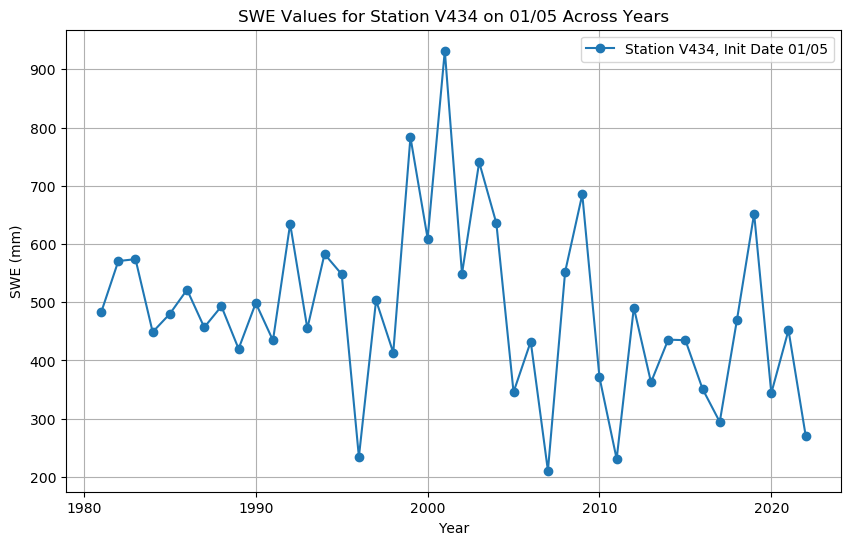

In [18]:
import matplotlib.pyplot as plt

# Station_ID und init_date auswählen
station_id = 'V434'
init_date = '01/05'

# Überprüfen, ob die Daten vorhanden sind
if station_id in SWE_dates["Station_ID"].values and init_date in SWE_dates["init_dates"].values:
    # Daten für das ausgewählte Basin und Initialisierungsdatum extrahieren
    data_to_plot = SWE_dates.sel(Station_ID=station_id, init_dates=init_date)["swe_values"]

    # Plotten
    plt.figure(figsize=(10, 6))
    plt.plot(SWE_dates["year"], data_to_plot, marker='o', label=f'Station {station_id}, Init Date {init_date}')
    plt.title(f'SWE Values for Station {station_id} on {init_date} Across Years')
    plt.xlabel('Year')
    plt.ylabel('SWE (mm)')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print(f"Station ID {station_id} or Init Date {init_date} not found in the dataset.")


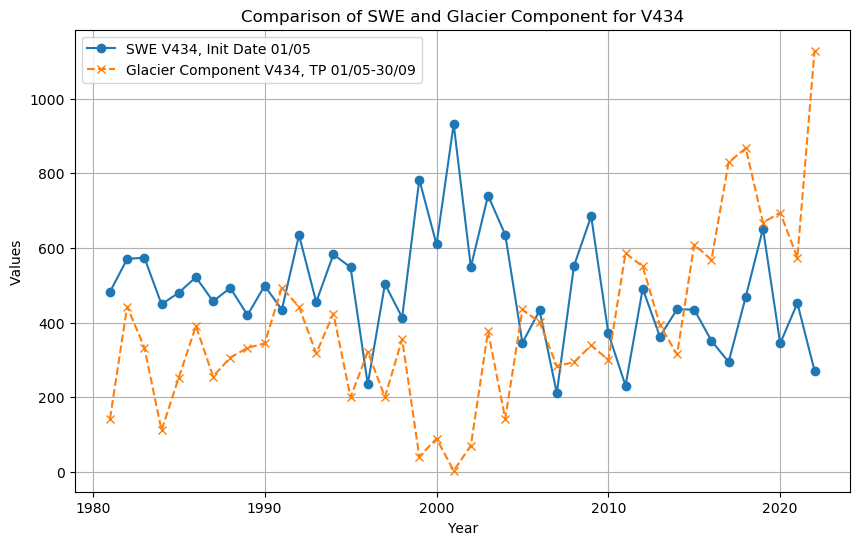

In [19]:
import matplotlib.pyplot as plt

# SWE Plot-Parameter
station_id = 'V434'
init_date = '01/05'

# Glacier Component Plot-Parameter
basin_id = 'V434'
target_period = '01/05-30/09'

# Erstellen des Plots
plt.figure(figsize=(10, 6))

# SWE-Daten plotten
if station_id in SWE_dates["Station_ID"].values and init_date in SWE_dates["init_dates"].values:
    swe_data = SWE_dates.sel(Station_ID=station_id, init_dates=init_date)["swe_values"]
    plt.plot(SWE_dates["year"], swe_data, marker='o', label=f'SWE {station_id}, Init Date {init_date}')
else:
    print(f"SWE: Station ID {station_id} or Init Date {init_date} not found in the dataset.")

# Glacier Component-Daten plotten
if basin_id in glacier_component["ID"].values and target_period in glacier_component["relevant_TP"].values:
    glacier_data = glacier_component.sel(ID=basin_id, relevant_TP=target_period)["gl_tot_sum"]
    plt.plot(glacier_component["year"], glacier_data, marker='x', linestyle='--', label=f'Glacier Component {basin_id}, TP {target_period}')
else:
    print(f"Glacier Component: Basin ID {basin_id} or Target Period {target_period} not found in the dataset.")

# Plot konfigurieren
plt.title(f'Comparison of SWE and Glacier Component for {station_id}')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()


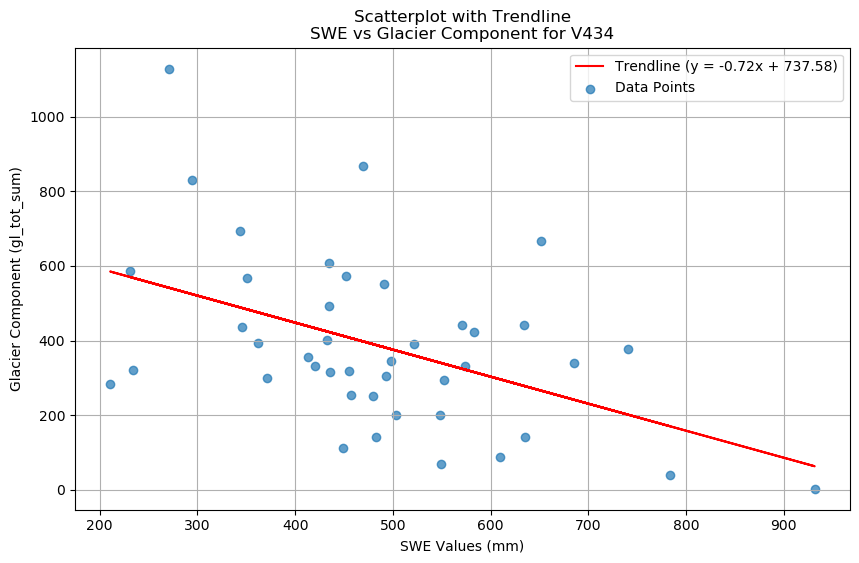

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# SWE Plot-Parameter
station_id = 'V434'
init_date = '01/05'

# Glacier Component Plot-Parameter
basin_id = 'V434'
target_period = '01/05-30/09'

# Datenextraktion
swe_data = None
glacier_data = None

if station_id in SWE_dates["Station_ID"].values and init_date in SWE_dates["init_dates"].values:
    swe_data = SWE_dates.sel(Station_ID=station_id, init_dates=init_date)["swe_values"].values
else:
    print(f"SWE: Station ID {station_id} or Init Date {init_date} not found in the dataset.")

if basin_id in glacier_component["ID"].values and target_period in glacier_component["relevant_TP"].values:
    glacier_data = glacier_component.sel(ID=basin_id, relevant_TP=target_period)["gl_tot_sum"].values
else:
    print(f"Glacier Component: Basin ID {basin_id} or Target Period {target_period} not found in the dataset.")

# Prüfen, ob beide Datensätze vorhanden sind
if swe_data is not None and glacier_data is not None:
    # Daten für Scatterplot vorbereiten (gemeinsame Jahre)
    x = swe_data
    y = glacier_data

    # Entfernen von NaN-Werten (falls vorhanden)
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Trendlinie berechnen
    trend_coeffs = np.polyfit(x, y, 1)  # Grad 1 für eine lineare Trendlinie
    trendline = np.polyval(trend_coeffs, x)

    # Plot erstellen
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data Points', alpha=0.7)
    plt.plot(x, trendline, color='red', label=f'Trendline (y = {trend_coeffs[0]:.2f}x + {trend_coeffs[1]:.2f})')
    plt.title(f'Scatterplot with Trendline\nSWE vs Glacier Component for {station_id}')
    plt.xlabel('SWE Values (mm)')
    plt.ylabel('Glacier Component (gl_tot_sum)')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Nicht genügend Daten für den Scatterplot vorhanden.")


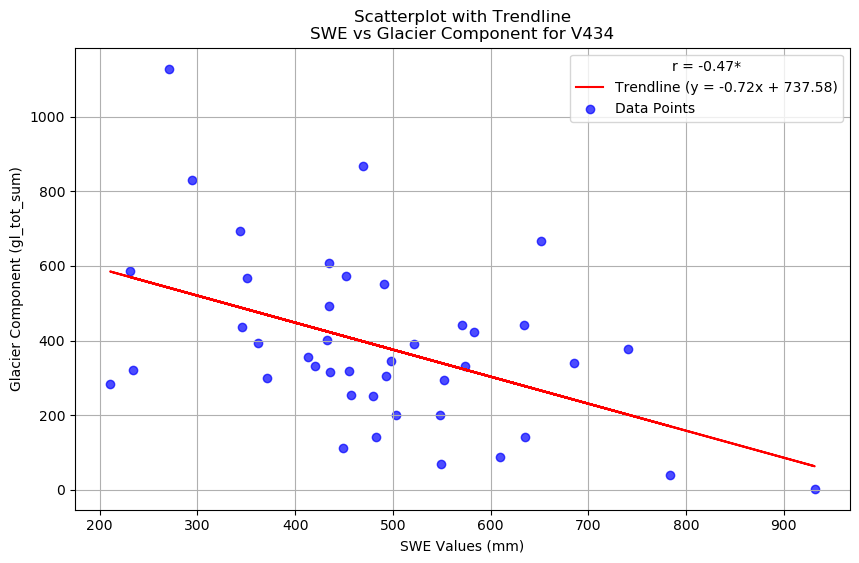

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# SWE Plot-Parameter
station_id = 'V434'
init_date = '01/05'

# Glacier Component Plot-Parameter
basin_id = 'V434'
target_period = '01/05-30/09'

# Datenextraktion
swe_data = None
glacier_data = None

if station_id in SWE_dates["Station_ID"].values and init_date in SWE_dates["init_dates"].values:
    swe_data = SWE_dates.sel(Station_ID=station_id, init_dates=init_date)["swe_values"].values
else:
    print(f"SWE: Station ID {station_id} or Init Date {init_date} not found in the dataset.")

if basin_id in glacier_component["ID"].values and target_period in glacier_component["relevant_TP"].values:
    glacier_data = glacier_component.sel(ID=basin_id, relevant_TP=target_period)["gl_tot_sum"].values
else:
    print(f"Glacier Component: Basin ID {basin_id} or Target Period {target_period} not found in the dataset.")

# Prüfen, ob beide Datensätze vorhanden sind
if swe_data is not None and glacier_data is not None:
    # Daten für Scatterplot vorbereiten (gemeinsame Jahre)
    x = swe_data
    y = glacier_data

    # Entfernen von NaN-Werten (falls vorhanden)
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Trendlinie berechnen
    trend_coeffs = np.polyfit(x, y, 1)  # Grad 1 für eine lineare Trendlinie
    trendline = np.polyval(trend_coeffs, x)

    # Pearson-Korrelation berechnen
    r_value, p_value = pearsonr(x, y)
    significance = "*" if p_value < 0.05 else ""  # Signifikanz prüfen

    # Plot erstellen
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data Points', color='blue', alpha=0.7)
    plt.plot(x, trendline, color='red', label=f'Trendline (y = {trend_coeffs[0]:.2f}x + {trend_coeffs[1]:.2f})')
    plt.title(f'Scatterplot with Trendline\nSWE vs Glacier Component for {station_id}')
    plt.xlabel('SWE Values (mm)')
    plt.ylabel('Glacier Component (gl_tot_sum)')
    plt.grid()
    plt.legend(loc='upper right', title=f"r = {r_value:.2f}{significance}")
    plt.show()
else:
    print("Nicht genügend Daten für den Scatterplot vorhanden.")


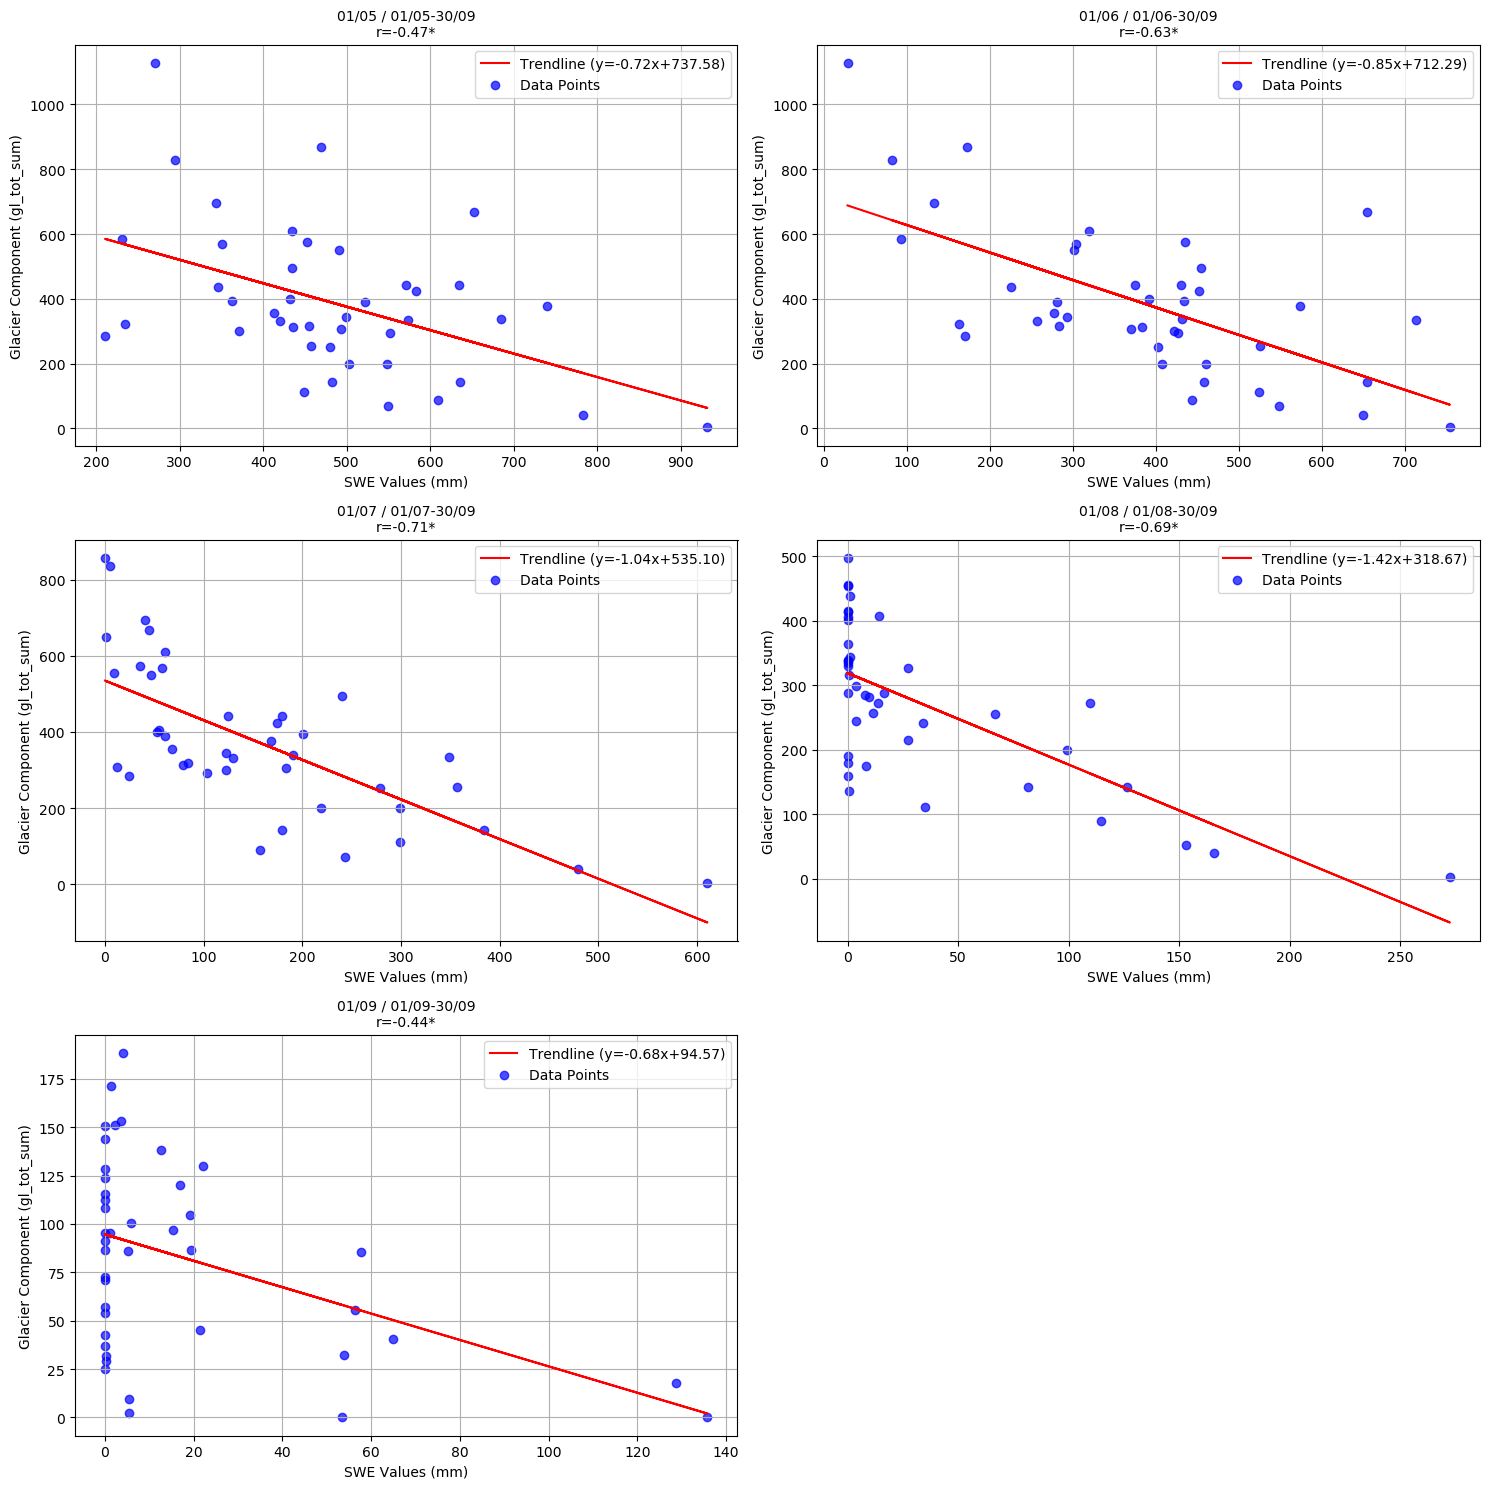

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Parameters
station_id = 'V434'
basin_id = 'V434'

# Combinations of init_date and target_period
init_dates = ['01/05', '01/06', '01/07', '01/08', '01/09']
target_periods = ['01/05-30/09', '01/06-30/09', '01/07-30/09', '01/08-30/09', '01/09-30/09']

# Subplot configuration
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 grid
axes = axes.flatten()  # Flatten for easy indexing

# Iterate over each combination
for idx, (init_date, target_period) in enumerate(zip(init_dates, target_periods)):
    # Get subplot
    ax = axes[idx]

    # Extract SWE data
    if station_id in SWE_dates["Station_ID"].values and init_date in SWE_dates["init_dates"].values:
        swe_data = SWE_dates.sel(Station_ID=station_id, init_dates=init_date)["swe_values"].values
    else:
        print(f"SWE: Station ID {station_id} or Init Date {init_date} not found.")
        continue

    # Extract Glacier Component data
    if basin_id in glacier_component["ID"].values and target_period in glacier_component["relevant_TP"].values:
        glacier_data = glacier_component.sel(ID=basin_id, relevant_TP=target_period)["gl_tot_sum"].values
    else:
        print(f"Glacier Component: Basin ID {basin_id} or Target Period {target_period} not found.")
        continue

    # Prepare data for plotting
    x = swe_data
    y = glacier_data

    # Remove NaN values
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Skip if no valid data
    if len(x) == 0 or len(y) == 0:
        ax.set_title(f"No Data for {init_date} / {target_period}")
        continue

    # Calculate trendline
    trend_coeffs = np.polyfit(x, y, 1)
    trendline = np.polyval(trend_coeffs, x)

    # Calculate Pearson correlation
    r_value, p_value = pearsonr(x, y)
    significance = "*" if p_value < 0.05 else ""

    # Plot scatter and trendline
    ax.scatter(x, y, color='blue', alpha=0.7, label='Data Points')
    ax.plot(x, trendline, color='red', label=f'Trendline (y={trend_coeffs[0]:.2f}x+{trend_coeffs[1]:.2f})')

    # Configure subplot
    ax.set_title(f'{init_date} / {target_period}\nr={r_value:.2f}{significance}', fontsize=10)
    ax.set_xlabel('SWE Values (mm)')
    ax.set_ylabel('Glacier Component (gl_tot_sum)')
    ax.legend(loc='upper right')
    ax.grid()

# Remove unused subplots if there are any
for ax in axes[len(init_dates):]:
    fig.delaxes(ax)

# Final layout
plt.tight_layout()
plt.show()
